# Protocol: Comparison of Waypoints and HLL as Indicators of State Space Coverage

Date: 16.9.2021

## Question

Do discovered waypoints and the number of Unique States Visited counted by a HyperLogLog++ give similar indication of state space coverage?

## Hypothesis

Both indicators should give similar results, i.e. when 20 waypoints are discovered, the coverage according to the HyperLogLog++ estimation should be around 20% of the state space.

## Setup

- GPU: NVIDIA GeForce RTX 2080 Ti
- Program: `main` branch, commit e160572
- Model: Waypoints model
- CUDA_FLAGS: `-DGRAPPLE_MODEL=WaypointsState`

## Implementation

We run a single experiment with an arbitrary number of 1000 runs à 250 VTs.

```
$ time ./build/grapple -s 1736331306 -n 1000
...

real    7m22.195s
user    7m21.844s
sys     0m0.296s
```

Full output data is available at [EXP-01-comparison-waypoints-hll.csv](./data/EXP-01-comparison-waypoints-hll.csv).

## Evaluation

We compare the two indicators by plotting them:

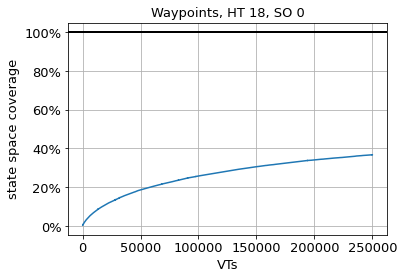

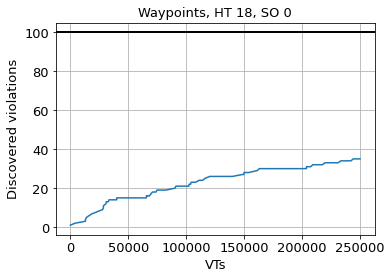

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use("presentation.mplstyle")

data = pd.read_csv("./data/EXP-01-comparison-waypoints-hll.csv", skipinitialspace=True)

pp = data.plot(x="vts", xlabel="VTs", y="visited_percent", ylabel="State space coverage", grid=True, legend=False, title="Waypoints, HT 18, SO 0")
pp.axhline(y=100, color="black", linewidth=2)
pp.yaxis.set_major_formatter(mtick.PercentFormatter())
pp.get_figure().savefig("output-assets/EXP-01-comparison-waypoints-hll-1.pdf")

pp = data[pd.notnull(data["state"])].plot(x="vts", xlabel="VTs", y="uniques", ylabel="Discovered violations", grid=True, legend=False, title="Waypoints, HT 18, SO 0")
pp.axhline(y=100, color="black", linewidth=2)
pp.get_figure().savefig("output-assets/EXP-01-comparison-waypoints-hll-2.pdf")

## Conclusion, Discussion

The experiment has shown that both indicators seem to resemble each other closely.

Thus, our Hypothesis can be confirmed.